In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("PH-Sales.csv")
df

,Month-Year,Number of Tractor Sold
0,Jan-03,141
1,Feb-03,157
2,Mar-03,185
3,Apr-03,199
4,May-03,203
...,...,...
139,Aug-14,848
140,Sep-14,640
141,Oct-14,581
142,Nov-14,519


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Month-Year              144 non-null    object
 1   Number of Tractor Sold  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


covert to time column

In [4]:
dates = pd.date_range(start = '2003-01', periods= len(df), freq='MS')
dates

DatetimeIndex(['2003-01-01', '2003-02-01', '2003-03-01', '2003-04-01',
               '2003-05-01', '2003-06-01', '2003-07-01', '2003-08-01',
               '2003-09-01', '2003-10-01',
               ...
               '2014-03-01', '2014-04-01', '2014-05-01', '2014-06-01',
               '2014-07-01', '2014-08-01', '2014-09-01', '2014-10-01',
               '2014-11-01', '2014-12-01'],
              dtype='datetime64[ns]', length=144, freq='MS')

In [5]:
df['month'] = dates.month

In [6]:
df['year'] = dates.year

In [7]:
df

,Month-Year,Number of Tractor Sold,month,year
0,Jan-03,141,1,2003
1,Feb-03,157,2,2003
2,Mar-03,185,3,2003
3,Apr-03,199,4,2003
4,May-03,203,5,2003
...,...,...,...,...
139,Aug-14,848,8,2014
140,Sep-14,640,9,2014
141,Oct-14,581,10,2014
142,Nov-14,519,11,2014


In [8]:
df.rename(columns={'Number of Tractor Sold': 'Tractor-Sales'}, inplace = True)

In [9]:
df.head()

,Month-Year,Tractor-Sales,month,year
0,Jan-03,141,1,2003
1,Feb-03,157,2,2003
2,Mar-03,185,3,2003
3,Apr-03,199,4,2003
4,May-03,203,5,2003


covert dates to index

In [10]:
df.set_index(dates, inplace=True)
df.head()

,Month-Year,Tractor-Sales,month,year
2003-01-01,Jan-03,141,1,2003
2003-02-01,Feb-03,157,2,2003
2003-03-01,Mar-03,185,3,2003
2003-04-01,Apr-03,199,4,2003
2003-05-01,May-03,203,5,2003


In [11]:
df.drop(['Month-Year'], axis=1, inplace=True)
df

,Tractor-Sales,month,year
2003-01-01,141,1,2003
2003-02-01,157,2,2003
2003-03-01,185,3,2003
2003-04-01,199,4,2003
2003-05-01,203,5,2003
...,...,...,...
2014-08-01,848,8,2014
2014-09-01,640,9,2014
2014-10-01,581,10,2014
2014-11-01,519,11,2014


In [12]:
ts_sales = df['Tractor-Sales']

In [13]:
ts_sales

2003-01-01    141
2003-02-01    157
2003-03-01    185
2003-04-01    199
2003-05-01    203
             ... 
2014-08-01    848
2014-09-01    640
2014-10-01    581
2014-11-01    519
2014-12-01    605
Freq: MS, Name: Tractor-Sales, Length: 144, dtype: int64

<AxesSubplot:>

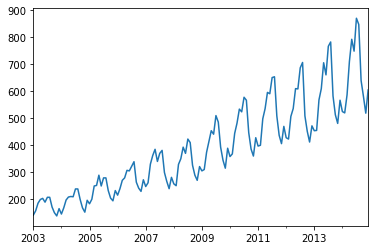

In [14]:
ts_sales.plot()

This looks like a seasonal trend
# decompose

1. trends
2. season

In [15]:
! pip install statsmodels

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [17]:
decompose = seasonal_decompose(ts_sales)

<AxesSubplot:>

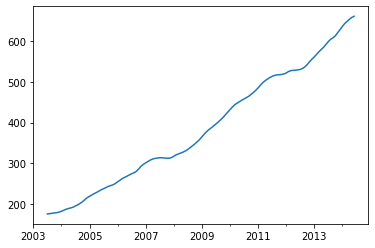

In [18]:
decompose.trend.plot()

In [19]:
decompose.trend

2003-01-01   NaN
2003-02-01   NaN
2003-03-01   NaN
2003-04-01   NaN
2003-05-01   NaN
              ..
2014-08-01   NaN
2014-09-01   NaN
2014-10-01   NaN
2014-11-01   NaN
2014-12-01   NaN
Freq: MS, Name: trend, Length: 144, dtype: float64

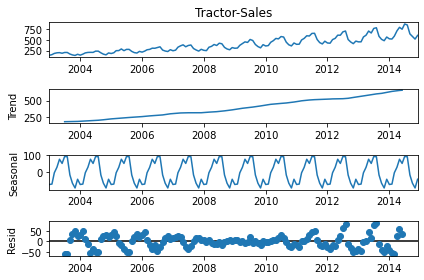

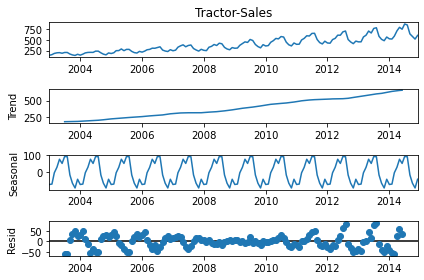

In [20]:
decompose.plot()

<AxesSubplot:>

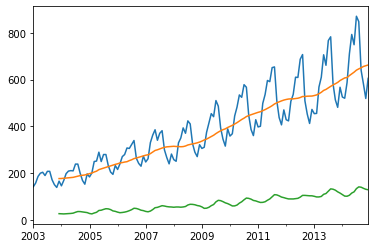

In [21]:
# rolling statistics
ts_sales.plot()
ts_sales.rolling(window=12).mean().plot()
ts_sales.rolling(window=12).std().plot()

<AxesSubplot:>

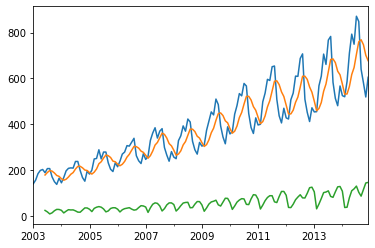

In [22]:
ts_sales.plot()
ts_sales.rolling(window=6).mean().plot()
ts_sales.rolling(window=6).std().plot()

<AxesSubplot:>

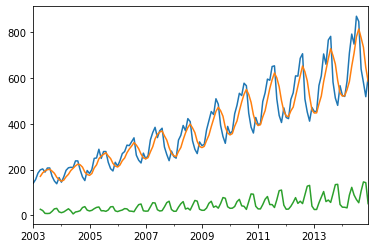

In [23]:
ts_sales.plot()
ts_sales.rolling(window=4).mean().plot()
ts_sales.rolling(window=4).std().plot()

with increase in window size, smoothening happens

In [27]:
pivot_df = pd.pivot(df, values='Tractor-Sales', index='year', columns='month') # summarize based on a criteria
pivot_df

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2003,141,157,185,199,203,189,207,207,171,150,138,165
2004,145,168,197,208,210,209,238,238,199,168,152,196
2005,183,200,249,251,289,249,279,279,232,204,194,232
2006,215,239,270,279,307,305,322,339,263,241,229,272
2007,247,261,330,362,385,340,370,381,299,266,239,281
2008,257,250,329,350,393,370,423,410,326,289,270,321
2009,305,310,374,414,454,441,510,486,393,345,315,389
2010,358,368,444,482,534,524,578,567,447,386,360,428
2011,397,400,498,536,596,591,651,654,509,437,406,470


TypeError: 'list' object is not callable

<AxesSubplot:xlabel='year'>

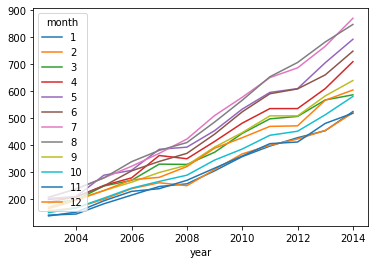

In [30]:
pivot_df.plot()

In [31]:
ts_sales

2003-01-01    141
2003-02-01    157
2003-03-01    185
2003-04-01    199
2003-05-01    203
             ... 
2014-08-01    848
2014-09-01    640
2014-10-01    581
2014-11-01    519
2014-12-01    605
Freq: MS, Name: Tractor-Sales, Length: 144, dtype: int64

<AxesSubplot:>

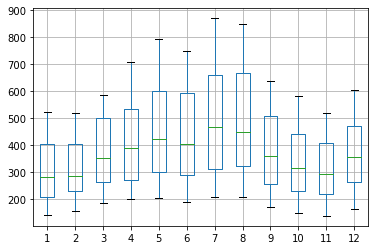

In [32]:
pivot_df.boxplot()

C:\Users\VMDRE465\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Tractor-Sales', ylabel='Density'>

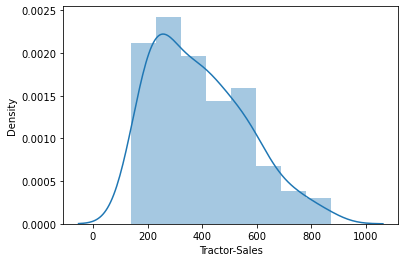

In [34]:
import seaborn as sns

sns.distplot(ts_sales)

In [36]:
from statsmodels.tsa.stattools import adfuller

In [46]:
#augmented digi fuller test
adfuller(ts_sales)  # second value is p value
# if pvalue <.05 it is a stationary data

(1.1088250591467306,
 0.9952912415248419,
 14,
 129,
 {'1%': -3.482087964046026,
  '5%': -2.8842185101614626,
  '10%': -2.578864381347275},
 1082.5357724796872)

for arima model we need to check if function is stationary or not

In [44]:
def test_stationary(timeseries):
    roll_mean = timeseries.rolling(12).mean()
    roll_stat = timeseries.rolling(12).std()
    
    plt.figure(figsize=(18,10))
    plt.grid('both')
    plt.plot(timeseries)
    plt.plot(roll_mean)
    plt.plot(roll_stat)
    
    print(adfuller(timeseries))

(1.1088250591467306, 0.9952912415248419, 14, 129, {'1%': -3.482087964046026, '5%': -2.8842185101614626, '10%': -2.578864381347275}, 1082.5357724796872)


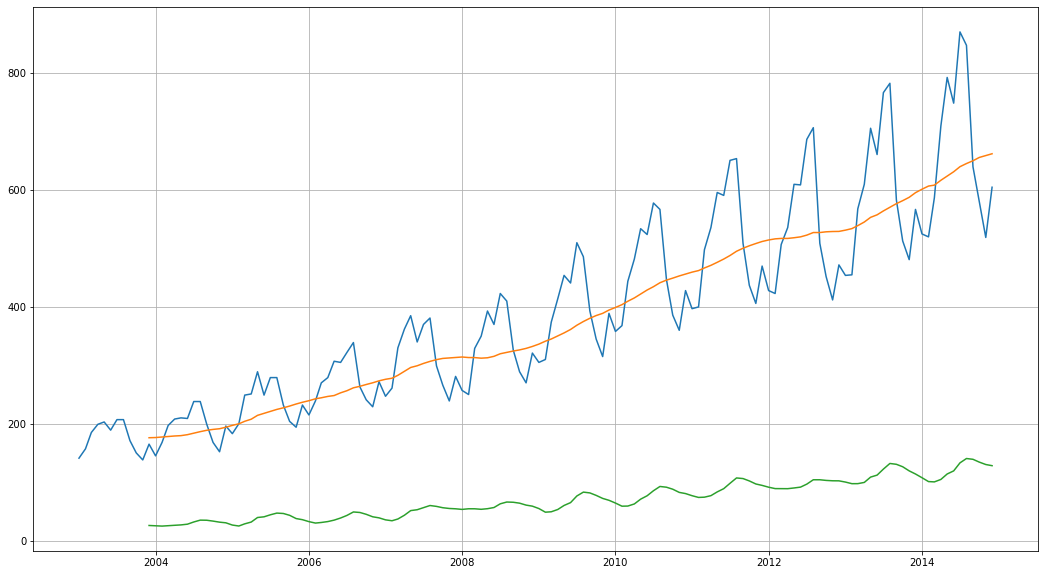

In [45]:
test_stationary(ts_sales)

In [43]:
# non stationary means mean not constant and std const